In [19]:
import pandas as pd 
  
# creating a data frame 
df = pd.read_csv("weather.csv") 
df.head(50)

,city,lat,lon,month,monthnum,sunshine,rain
0,San Diego,32.715736,-117.161087,Jan,1,217,1.53
1,San Diego,32.715736,-117.161087,Feb,2,255,0.15
2,San Diego,32.715736,-117.161087,Mar,3,234,0.57
3,San Diego,32.715736,-117.161087,Apr,4,236,1.01
4,San Diego,32.715736,-117.161087,May,5,277,0.02
5,San Diego,32.715736,-117.161087,Jun,6,293,0.03
6,San Diego,32.715736,-117.161087,Jul,7,253,0.07
7,San Diego,32.715736,-117.161087,Aug,8,261,0.12
8,San Diego,32.715736,-117.161087,Sep,9,242,0.78
9,San Diego,32.715736,-117.161087,Oct,10,262,1.81


In [35]:
import warnings
warnings.filterwarnings("ignore")

### Data Exploration

In [40]:
df.columns

Index(['city', 'lat', 'lon', 'month', 'monthnum', 'sunshine', 'rain',
       'city_encoded'],
      dtype='object')

In [18]:
# Looking at some statistics
df.describe

<bound method NDFrame.describe of          city        lat         lon month  monthnum  sunshine  rain  \
0   San Diego  32.715736 -117.161087   Jan         1       217  1.53   
1   San Diego  32.715736 -117.161087   Feb         2       255  0.15   
2   San Diego  32.715736 -117.161087   Mar         3       234  0.57   
3   San Diego  32.715736 -117.161087   Apr         4       236  1.01   
4   San Diego  32.715736 -117.161087   May         5       277  0.02   
..        ...        ...         ...   ...       ...       ...   ...   
67      Miami  25.761681  -80.191788   Aug         8       263  8.88   
68      Miami  25.761681  -80.191788   Sep         9       216  9.86   
69      Miami  25.761681  -80.191788   Oct        10       215  6.33   
70      Miami  25.761681  -80.191788   Nov        11       212  3.27   
71      Miami  25.761681  -80.191788   Dec        12       209  2.04   

    city_encoded  
0              4  
1              4  
2              4  
3              4  
4     

In [19]:
# Looking at datatypes we mostly see numerical data that we could use in a regression problem.
df.dtypes

city             object
lat             float64
lon             float64
month            object
monthnum          int64
sunshine          int64
rain            float64
city_encoded      int64
dtype: object

In [20]:
#Highest and lowest sunshine 
high_sunshine = df[df['sunshine'] == df['sunshine'].max()][['city', 'sunshine']]
low_sunshine = df[df['sunshine'] == df['sunshine'].min()][['city', 'sunshine']]
print(f"{high_sunshine}")
print(f"{low_sunshine}")

       city  sunshine
30  Chicago       333
       city  sunshine
35  Chicago       118


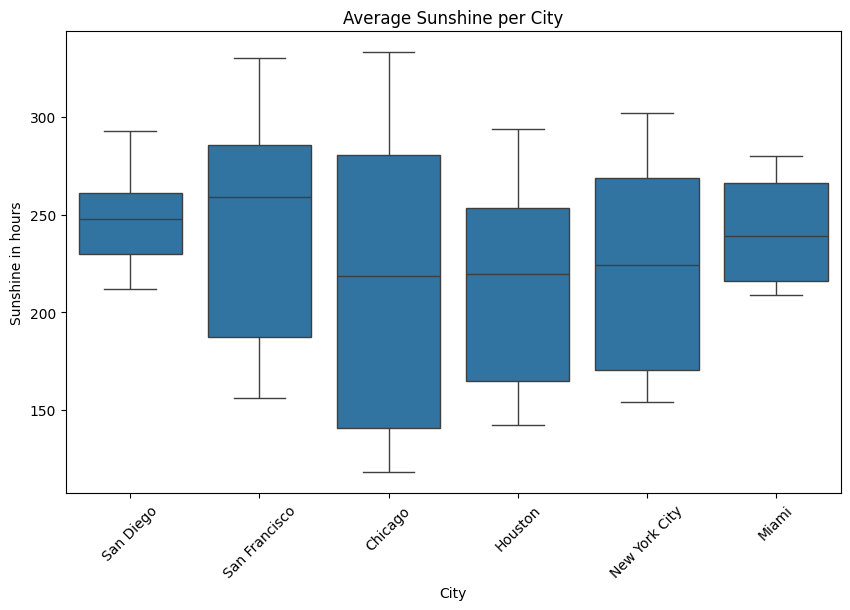

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creatinging a boxplot for average sunshine per city to see the distribution (including median, quartiles, and potential outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['city'], y=df['sunshine'])
plt.title('Average Sunshine per City')
plt.xlabel('City')
plt.ylabel('Sunshine in hours')
plt.xticks(rotation=45) 
plt.show()


Median is higher in California which makes sense as we tend to have stable weather and not capricious weather as in the other states which are prone to hurricanes and snow storms. 

In [21]:
#Highest and lowest rain 
high_rain = df[df['rain'] == df['rain'].max()][['city', 'rain']]
low_rain = df[df['rain'] == df['rain'].min()][['city', 'rain']]
print(f"{high_rain}")
print(f"{low_rain}")

     city  rain
68  Miami  9.86
             city  rain
13  San Francisco  0.01


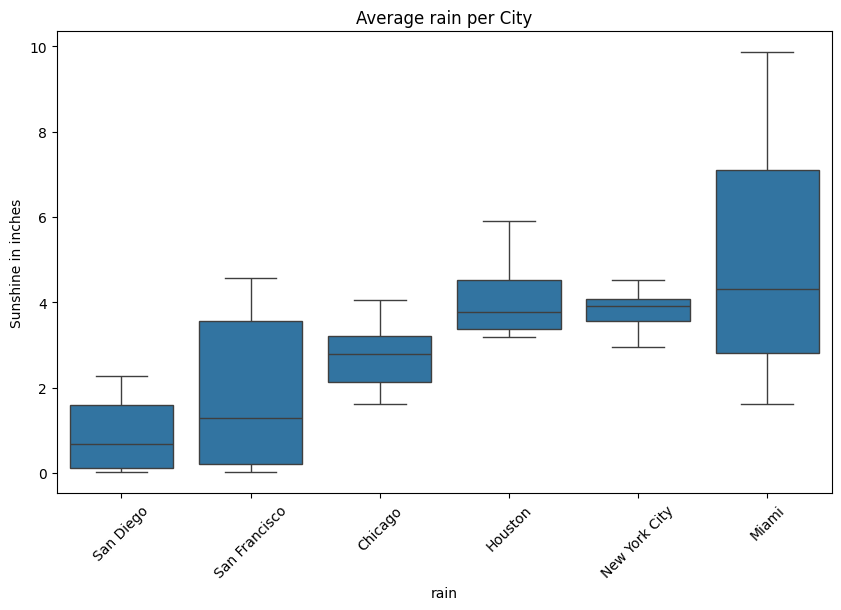

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creatinging a boxplot for average rain per city
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['city'], y=df['rain'])
plt.title('Average rain per City')
plt.xlabel('rain')
plt.ylabel('Sunshine in inches')
plt.xticks(rotation=45) 
plt.show()

Median is lower for California cities for rain, this makes sense as California is usually in a drought.

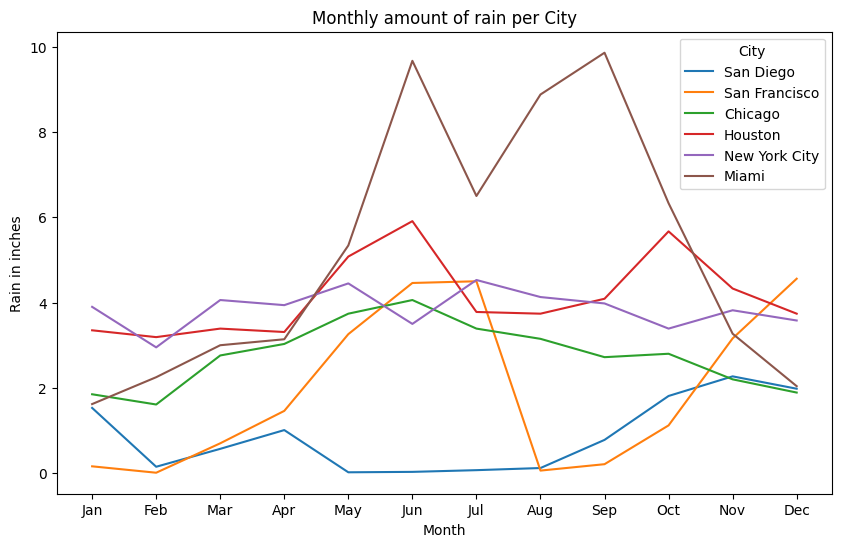

In [38]:
# plotting month vs rain with hue as city using a scatter plot 
plt.figure(figsize=(10, 6))

# Scatter plot for rain vs month with city as hue
sns.lineplot(x=df['month'], y=df['rain'], hue=df['city'])

plt.title('Monthly amount of rain per City')
plt.xlabel('Month')
plt.ylabel('Rain in inches')
plt.legend(title='City')
plt.show()


The fact that Houston and Miami would have higher rain in the late summer/fall makes sense because that is hurricane season.  

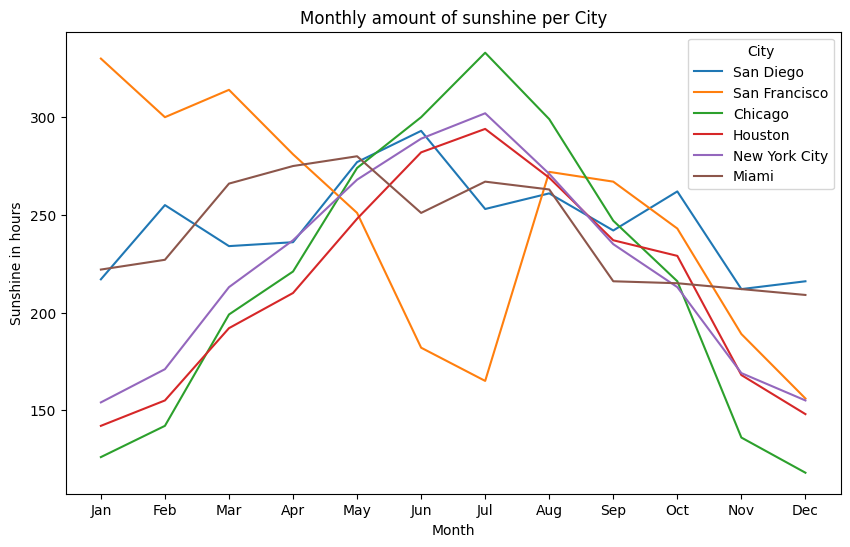

In [39]:
# plotting month vs rain with hue as city using a scatter plot 
plt.figure(figsize=(10, 6))

# Scatter plot for rain vs month with city as hue
sns.lineplot(x=df['month'], y=df['sunshine'], hue=df['city'])

plt.title('Monthly amount of sunshine per City')
plt.xlabel('Month')
plt.ylabel('Sunshine in hours')
plt.legend(title='City')
plt.show()

This is interesting because California cities near the beach tend to get "may grey" and "june gloom" which we can see here as San Francisco and San Diego dip in sunshine in those months. 

### Hypothesis 
City can be predicted from the following features: Latitude, longitude, monthnum, sunshine, rain.

Note: month will be omitted because it was already encoded into a number. 

In [14]:
# Data transformation: encoding city to a number to predict it later.
# Let's look at the unique cities we will encode
print(df['city'].unique())
print(df['city'].value_counts())


['San Diego' 'San Francisco' 'Chicago' 'Houston' 'New York City' 'Miami']
city
San Diego        12
San Francisco    12
Chicago          12
Houston          12
New York City    12
Miami            12
Name: count, dtype: int64


In [17]:
from sklearn.preprocessing import LabelEncoder

# using label encoding because it assigns a unique integer to each category.
label_encoder = LabelEncoder()
# Creating an encoded 'city' column
df['city_encoded'] = label_encoder.fit_transform(df['city'])
df

,city,lat,lon,month,monthnum,sunshine,rain,city_encoded
0,San Diego,32.715736,-117.161087,Jan,1,217,1.53,4
1,San Diego,32.715736,-117.161087,Feb,2,255,0.15,4
2,San Diego,32.715736,-117.161087,Mar,3,234,0.57,4
3,San Diego,32.715736,-117.161087,Apr,4,236,1.01,4
4,San Diego,32.715736,-117.161087,May,5,277,0.02,4
...,...,...,...,...,...,...,...,...
67,Miami,25.761681,-80.191788,Aug,8,263,8.88,2
68,Miami,25.761681,-80.191788,Sep,9,216,9.86,2
69,Miami,25.761681,-80.191788,Oct,10,215,6.33,2
70,Miami,25.761681,-80.191788,Nov,11,212,3.27,2


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Grabbing features and label
X = df.drop(columns=['city', 'month', 'city_encoded']) 
y = df['city_encoded'] 
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [46]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 100.00%
               precision    recall  f1-score   support

      Chicago       1.00      1.00      1.00         4
      Houston       1.00      1.00      1.00         3
        Miami       1.00      1.00      1.00         1
New York City       1.00      1.00      1.00         5
    San Diego       1.00      1.00      1.00         5
San Francisco       1.00      1.00      1.00         4

     accuracy                           1.00        22
    macro avg       1.00      1.00      1.00        22
 weighted avg       1.00      1.00      1.00        22



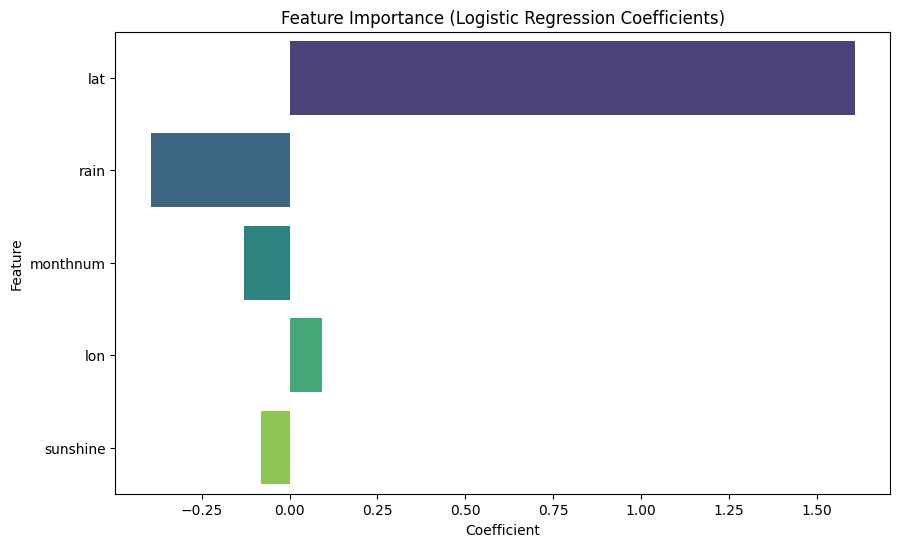

In [47]:
import pandas as pd

# Coefficients from the logistic regression model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': classifier.coef_[0]
})

# Sort by absolute value of the coefficient
coefficients['Abs Coeff'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs Coeff', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()


We can see that latitude and longitude have a positive correlation with predicting the city and rain, sunshine, month do not. This makes sense because latitude determined how far north or south we are from the equator and longitude determines where we are west or east. 

## Now Lets use potly to gather information! 

In [4]:
!pip install nbformat


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.3/311.3 kB 3.6 MB/s eta 0:00:00a 0:00:01
  Using cached referencing-0.35.1-py3-none-any.whl (26 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 5.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [21]:
# Create a column for average sunshine over year
import numpy as np
df['avg_sunshine'] = df.groupby('city')['sunshine'].transform('mean')



In [22]:
fig = px.scatter_geo(df,
                     lat='lat', 
                     lon='lon',  
                     hover_name='city',  
                     size='avg_sunshine',  
                     color='avg_sunshine',  
                     projection="natural earth",  
                     title='Cities and Average Sunshine')

fig.update_geos(
    showcountries=True, countrycolor="LightGray",  
    showcoastlines=True, coastlinecolor="LightBlue" 
)
fig.write_html("sunshine_plotly.html")